# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

Monzani Florencia


# PARTE A

Parte A - Exploración de Datos: Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos... y todo Análisis Exploratorio de Datos debe responder preguntas. 
El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.

Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.

**DESCRIPCIÓN DEL DATASET** 

https://docs.opendata.aws/amazon-reviews-ml/readme.html

Se proporciona un conjunto de datos de reseñas de productos de Amazon para la clasificación de texto en español. El conjunto de datos está recopilado entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación por estrellas y un ID de revisor anónimo, un ID de producto anónimo y la categoría de producto (por ejemplo, "libros", "electrodomésticos", etc.) El dataset está equilibrado entre estrellas, por lo que cada calificación de estrellas constituye el 20% de las reseñas.


Hay 200.000, 5.000 y 5.000 revisiones en los conjuntos de train, development y test, respectivamente. La cantidad máxima de reseñas por revisor es 20 y la cantidad máxima de reseñas por producto es 20. Todas las reseñas se truncan después de 2000 caracteres y todas las reseñas tienen al menos 20 caracteres.


In [1]:
#LIBRERIAS
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import spacy


In [2]:
#CARGA DE DATASET
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EXPLORACIÓN DE DATASET**

In [3]:
dataset_dep = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_dev.json", lines= True)
dataset_dep.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [4]:
dataset_test = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_test.json", lines= True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [5]:
dataset_train = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_train.json", lines= True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


**Amazon proporciona tres dataset:**

Entrenamiento -> Training

Evaluación -> Test

Valiación -> Deployment (dataset_dep)

-Los dataset de Test y Trainning contienen 5.000 y 200.000 reseñas respectivamente, mientras que Deployment contiene 5.000 reseñas.



In [6]:
dataset_dep.shape

(5000, 8)

In [7]:
dataset_test.shape

(5000, 8)

In [8]:
dataset_train.shape

(200000, 8)

Para abordar este proyecto, haré un join de las tablas de Train y Test (para lograr una mejor partición de Test) y con el dataset de Deployment validaré el modelo.

In [9]:
#JOIN TEST & TRAIN
dataset=pd.concat([dataset_test, dataset_train])
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [10]:
dataset.shape

(205000, 8)

Calificaciones - ¿ Cómo están balanceadas las etiquetas (estrellas) ?

*Los dataset están equilibrados entre estrellas, por lo que cada calificación de estrellas constituye el 20% de las reseñas,tal como se muestra en los siguientes gráficos:*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


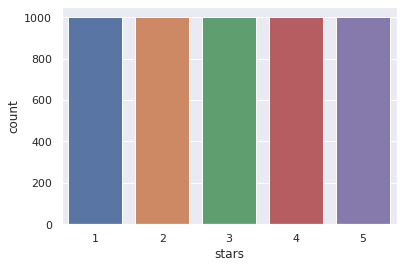

In [11]:
sns.countplot(dataset_dep.stars)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


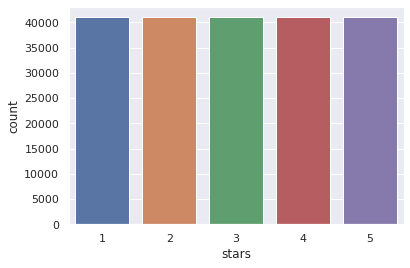

In [12]:
sns.countplot(dataset.stars)
plt.show()

Análisis de valores faltantes por Dataset:

*No se observan valores faltantes en las columnas*

In [13]:
dataset_dep.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [14]:
dataset.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Idioma - ¿ Que idiomas tengo disponibles en cada Dataset?

*El idioma de las reseñas en todos los dataset es ESPAÑOL*

In [15]:
dataset_dep.language.value_counts()

es    5000
Name: language, dtype: int64

In [16]:
dataset.language.value_counts()

es    205000
Name: language, dtype: int64

Exploración de reseñas

*Reseña al azar y su calificación:*

In [90]:
index_random = np.random.randint(0,high = dataset_dep.shape[0])
reseña_dep = dataset_dep.iloc[index_random].review_title
print(index_random, reseña_dep)
print(index_random, dataset_dep.iloc[index_random].stars)

4033 comodos
4033 5


In [28]:
index_random = np.random.randint(0,high = dataset.shape[0])
reseña = dataset.iloc[index_random].review_title
print(index_random, reseña)
print(index_random, dataset.iloc[index_random].stars)

68731 El material del cristal no es muy bueno pero está bien de precio
68731 2


¿ Cúal es la categoría de producto mejor calificada ? ¿ Y la peor ?



DATASET_DEV = *Como puede observarse, la categoría con mejor puntaje promedio asignado es digital_ebook_purchase (compra de libros digitalizados) y la categoría con peor puntaje promedio es musical_instruments (instrumentos musicales).*

In [19]:
ds=dataset_dep.pivot_table('stars', ['product_category'])
ds = ds.sort_values('stars')
ds

,stars
product_category,
musical_instruments,2.652174
lawn_and_garden,2.673267
wireless,2.845238
automotive,2.849711
industrial_supplies,2.911765
video_games,2.930233
shoes,2.933333
home_improvement,2.939799
office_product,2.955357


DATASET = *Como puede observarse, la categoría con mejor puntaje promedio asignado es book (libros ) y la categoría con peor puntaje promedio es lawn_and_garden (productos de jardinería).*

In [20]:
ds=dataset.pivot_table('stars', ['product_category'])
ds = ds.sort_values('stars')
ds

,stars
product_category,
lawn_and_garden,2.765179
wireless,2.820923
apparel,2.867029
electronics,2.887772
jewelry,2.925137
beauty,2.935703
automotive,2.958208
home,2.982869
pet_products,2.993176


# PARTE B

Parte B - Modelo de Machine Learning. En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.

Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.


**TOKENIZACIÓN**

Pasar de un único string de texto a una lista de string de oraciones.

In [21]:
#importo spacy en español
import spacy.cli
spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [22]:
from spacy import displacy

In [23]:
#Para generar un análisis se tiene que crear un objeto del modelo
nlp = spacy.load('es_core_news_sm') 

In [29]:
#Analizando el texto con Spacy, la variable doc contiene una versión analizada del texto, 
#aunque aparentemente se mantuvo sin cambios se generaron atributos y propiedades partidas
# del análisis del texto
doc=nlp(reseña)
print(doc)

El material del cristal no es muy bueno pero está bien de precio


In [30]:
#Para tokenizar oraciones
for num,oracion in enumerate(doc.sents):
    print(f'{num}: {oracion}')

#Una oración, por ser el titular 

0: El material del cristal no es muy bueno pero está bien de precio


In [31]:
#Para tokenizar palabras
for palabra in doc:
    print(palabra.text)

El
material
del
cristal
no
es
muy
bueno
pero
está
bien
de
precio


In [32]:
from spacy.pipeline import EntityRuler
nlp = spacy.load('es_core_news_sm')
ruler = EntityRuler(nlp, overwrite_ents=True)
#Esto es para que me deje sobreescribir el pipeline

In [33]:
#Separo en oraciones a la reseña
orac = nlp.create_pipe('sentencizer') # En esta primer etapa del Pipeline, separo las frases
nlp.add_pipe(orac, before='parser')  #identifica componentes gramaticales y los vuelve oración
doc=nlp(reseña)
for orac in doc.sents: #(.sents es para mostrar las oraciones en frases, en este caso hay una sola)
    print(orac)

El material del cristal no es muy bueno pero está bien de precio


In [34]:
# Para hacer una lista de tokens
lista_palabras=[palabra.text.replace('\n','') for palabra in doc[:30]]
print(lista_palabras)

['El', 'material', 'del', 'cristal', 'no', 'es', 'muy', 'bueno', 'pero', 'está', 'bien', 'de', 'precio']


In [35]:
#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)
len(stopwords_spacy)

['qué', 'supuesto', 'cuantas', 'siete', 'mismo', 'misma', 'nunca', 'uso', 'ampleamos', 'bastante', 'intento', 'nuevo', 'cuántos', 'poca', 'quizá', 'informo', 'dio', 'detrás', 'aquéllos', 'he', 'pudo', 'estar', 'valor', 'adelante', 'demás', 'vais', 'ellas', 'existe', 'queremos', 'sois', 'ha', 'entonces', 'usted', 'vuestro', 'cuánto', 'allí', 'próximos', 'un', 'fuimos', 'hacerlo', 'era', 'cada', 'manera', 'ésos', 'pues', 'me', 'siguiente', 'ocho', 'sin', 'tuyo', 'breve', 'lugar', 'solas', 'otros', 'usais', 'mientras', 'su', 'cuando', 'fueron', 'mía', 'estaba', 'son', 'tu', 'consigo', 'pasada', 'consideró', 'consigues', 'bien', 'de', 'sabe', 'suyas', 'arribaabajo', 'ver', 'emplear', 'antano', 'dado', 'si', 'alrededor', 'dentro', 'gran', 'la', 'dos', 'nuestro', 'varias', 'estaban', 'mios', 'raras', 'unas', 'saben', 'intentar', 'conseguimos', 'debido', 'mismas', 'nuestras', 'usa', 'había', 'sea', 'hacer', 'desde', 'ellos', 'muchas', 'yo', 'quizas', 'sabes', 'ti', 'dice', 'estamos', 'algún',

551

In [36]:
#Elimino Stopwords de la reseña
for palabra in doc:
    if palabra.is_stop == False:
        print(palabra)

material
cristal
precio


In [37]:
#Lemmatización
doc = nlp(reseña)
for lem in doc:
    print(lem.text, lem.lemma_)

El El
material material
del del
cristal cristal
no no
es ser
muy muy
bueno bueno
pero pero
está estar
bien bien
de de
precio preciar


**DATASET COMPLETO**

**MODELO**

* Benchmark: utilizo como feature REVIEW TITTLE (Título de Reseña)

* Modelo: utilizo como feature REVIEW BODY (Cuerpo de Reseña)

In [38]:
#Importo librerías de aprendizaje
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
#signos de puntuación
import string
puntua = string.punctuation + '¡¿'
puntua

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¡¿'

In [40]:
#Función para limpieza de datos
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    palabras = []
    for palabra in doc:
        if palabra.lemma_ != "-PRON-":
            temp = palabra.lemma_.strip()
        else:
            temp = palabra
        palabras.append(temp)
    
    clean_palabras = []
    for palabra in palabras:
        if palabra not in stopwords_spacy and palabra not in puntua:
            clean_palabras.append(palabra)
    
    return clean_palabras

In [41]:
#Ej. para probar función

text_data_cleaning(reseña)

['El', 'material', 'cristal', 'preciar']

In [42]:
#VECTORIZACIÓN

#importo librería de vectorización
from sklearn.svm import LinearSVC

In [43]:
#Defino la función de tokenizado y creo el clasificador
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

*Benchmark*

In [44]:
#Creo los vectores de datos
X = dataset['review_title']
y = dataset['stars']

In [45]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [46]:
X_train.head()

196144                                             Práctico
60473                                          No muy bueno
76076     es bonito y parece buen material, pero si se d...
170434                                                    A
26744                                           Son dina a5
Name: review_title, dtype: object

In [47]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [48]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fddfd70abf8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [49]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)

In [50]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.57      0.55     12311
           2       0.36      0.32      0.34     12204
           3       0.35      0.26      0.30     12161
           4       0.34      0.42      0.37     12385
           5       0.47      0.50      0.49     12439

    accuracy                           0.41     61500
   macro avg       0.41      0.41      0.41     61500
weighted avg       0.41      0.41      0.41     61500



In [51]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[6992, 2387,  976, 1207,  749],
       [3164, 3876, 2438, 1726, 1000],
       [1466, 2611, 3136, 3483, 1465],
       [ 853, 1152, 1487, 5237, 3656],
       [ 664,  862,  811, 3911, 6191]])

In [53]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([2])

In [54]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [55]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [56]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [57]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([2])

Se obtuvo en el modelo de Benchmark un accuracy de 0,41. Puede comprobarse el bajo desempeño del modelo en la predicción de la frase 1 ("Realmente me gustó mucho"), la cual fue puntuada con 2 estrellas, cuando a priori pareciera merecer 4 o 5.

*Modelo*

In [85]:
#Creo los vectores de datos
X = dataset['review_body']
y = dataset['stars']

In [86]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [87]:
X_train.head()

196144    Buen cable, parece resistente y no se enreda f...
60473                         Se le rompió esa misma tarde.
76076     al de 10 o 12 dias se despego y tuve que compr...
170434                          Perfecto y de buena calidad
26744     Este producto indica q es dina a4 pero no es a...
Name: review_body, dtype: object

In [88]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [89]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fddfd70abf8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [91]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)


In [92]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.65      0.60     12311
           2       0.36      0.32      0.34     12204
           3       0.33      0.30      0.31     12161
           4       0.37      0.31      0.34     12385
           5       0.52      0.62      0.57     12439

    accuracy                           0.44     61500
   macro avg       0.43      0.44      0.43     61500
weighted avg       0.43      0.44      0.43     61500



In [93]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[8008, 2293, 1083,  510,  417],
       [3409, 3930, 2778, 1203,  884],
       [1726, 2823, 3637, 2384, 1591],
       [ 728, 1298, 2315, 3842, 4202],
       [ 528,  634, 1137, 2380, 7760]])

In [94]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([5])

In [95]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [96]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [97]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [98]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([5])

Se obtuvo en el modelo final un accuracy de 0,44 . Comparando con el modelo benchmark se observa una mejora, por ejemplo en la frase 1 que obtuvo 2 estrellas, ahora fue clasificada con 5.

*MODELO en Dataset Development*

Para validar el funcionamiento del modelo, aplicaré el mismo en el dataset de validación.


In [99]:
#Creo los vectores de datos
X = dataset_dep['review_body']
y = dataset_dep['stars']

In [100]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

In [101]:
X_train.head()

1840    Falta cristal para tapar toda la pantalla, que...
2115    La distancia entre el tubo superior y el infer...
4437    Ligero, la señal de GPS es muy rápida, prestac...
1146    Producto caro, es correcto pero con el precio ...
2486          Esta bien, no sirve para Citroën y Peugeot.
Name: review_body, dtype: object

In [102]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [103]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fddfd70abf8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [76]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)

In [77]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.53      0.51       316
           2       0.29      0.27      0.28       309
           3       0.31      0.32      0.31       284
           4       0.32      0.29      0.30       301
           5       0.45      0.48      0.47       290

    accuracy                           0.38      1500
   macro avg       0.37      0.38      0.38      1500
weighted avg       0.37      0.38      0.38      1500



In [78]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[168,  78,  43,  17,  10],
       [ 89,  84,  61,  48,  27],
       [ 41,  58,  90,  53,  42],
       [ 25,  41,  56,  87,  92],
       [ 17,  28,  40,  65, 140]])

In [79]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([3])

In [81]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [80]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [82]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [83]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([3])

El accuracy obtenido del modelo aplicado al dataset de validación es también muy bajo (0,38), tal como lo esperaba.

# PARTE C

Parte C - Investigación.  El objetivo de esta sección es que sugieras cómo continuarías el proyecto, con el fin de mejorar el modelo o responder una pregunta que consideres interesante. 

Debes explicar qué te gustaría probar, por qué y cómo lo harías. 



Dado los resultados obtenidos, las conlusiones a las que llego son las siguientes:

**En cuanto a la base de datos:**

Antes de tomar esta base de datos como input para predecir como valorará una persona a un producto, debería corroborarse que éstas personas que ya evaluaron, fueron coherentes con lo que dejaron asentado en la reseña (título y cuerpo) y con la cantidad de estrellas que asignaron. También debería complementarse esta información con alguna encuesta de satisfacción o alguna otra información que nos permita validar las clasificaciones o inferir según nuestros criterios (los de la encuesta por ejemplo) si tiene 1,2,3,4 o 5 estrellas. Propongo esto, dado que las reseñas son muy subjeitvas: Por ej.: Hay casos en que una reseña que dice: "Ok", puede ser puntuada con 3 estrellas o con 5; también hay casos en que las reseñas no tienen sentido como por ej.: "hghg", al parecer éstas personas no querían dejar asentado nada y simplemente asignaron estrellas, en otros casos las reseñas parecerían merecer más o menos estrellas de las que tienen etc. ... 

**En cuanto a la librería y el modelo:**

En cuando a la librería, Spacy cuenta con pocas Stopwords, comparando con la cantidad de stopwords que tienen otras librerias en ingles.

En cuanto al modelo, podría mejorarse (ésto lo propongo para proyecto 4) agregando más variables como por ejemplo Categoría de Producto, ya que podemos inferir en la cantidad de estrellas promedio que tendrá un producto según su categoría. Y también podrían probarse otros modelos o librerias (ésto también me gustaría investigarlo para el proyecto 4).   

**Otras sugerencias:**

-Investigar otras librerías, ademas de SpaCy (como NLTK en español)

-Comparar resultados de modelos aplicados en los diferentes idiomas disponibles

-Volverlo un problema binario, prediciendo etiquetas Positivas o Negativas. En este caso creo que el accuracy mejoraría apenas un poco, dado que considero que el problema central es la subjetividad con que las personas dan una reseña y claisfican.






¡ MUCHAS GRACIAS !


Florencia Monzani 